Área mínima: 266 px²
Área máxima: 1846360 px²
Min width: 14, Max width: 1489
Min height: 12, Max height: 1550
Mean width: 224.48083515113743
Mean height: 162.32907447803055
Mean aspect ratio: 1.4394531494170497


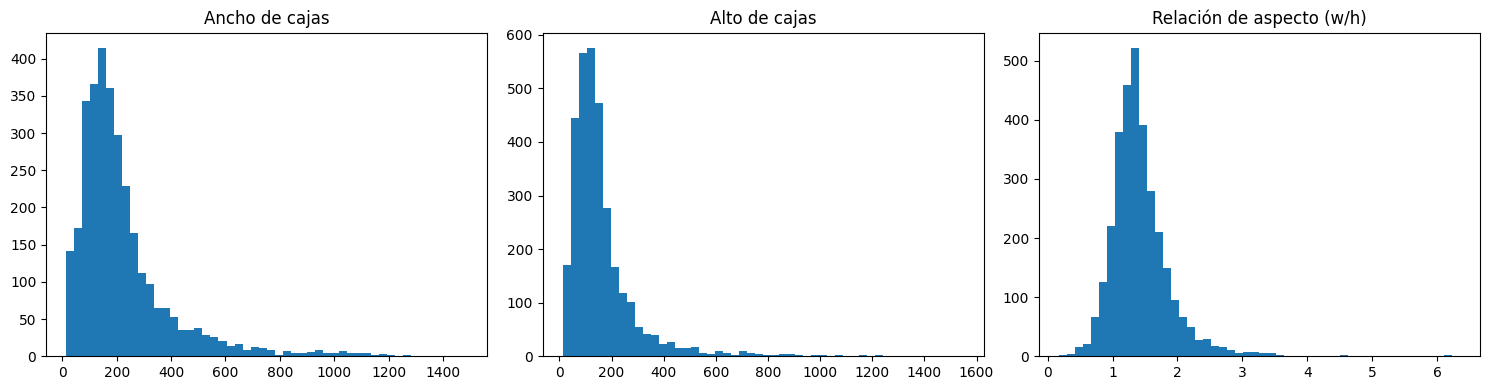

Área media: 57887.39 px²
Mediana: 22475.00 px²
Percentil 5: 1935.00
Percentil 95: 232750.00


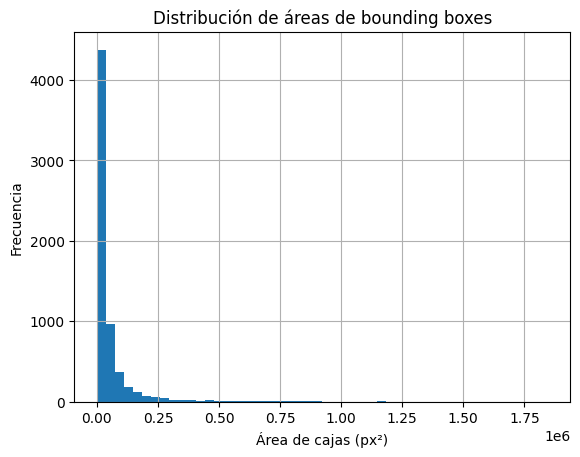

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pathlib 
import sys
import os 
import matplotlib.patches as patches


sys.path.append("..")

dataset_root = pathlib.Path("/home/Data/CBIS-DDSM-segmentation-2240x1792")
images_dir = dataset_root / 'images'
masks_dir = dataset_root / 'masks'
bb = dataset_root / 'bounding_boxes.csv'
bounding_boxes = pd.read_csv(bb)
images = os.listdir(images_dir)  
masks = os.listdir(masks_dir)
bounding_boxes_grouped = bounding_boxes.groupby("id")



def get_boxes_for_image(id_imagen, bb_grouped):

    # Quitar extensión si existe (como '.png', '.jpg')
    id_limpio = os.path.splitext(id_imagen)[0]
    group_df = bb_grouped.get_group(id_limpio)

    boxes=[]

    # Iterar sobre las filas del DataFrame
    for index, row in group_df.iterrows():
        # Obtener los valores de las columnas
        x = row['x']
        y = row['y']
        w = row['w']
        h = row['h']
        
        xmin = x
        ymin = y
        xmax = x + w
        ymax = y + h
        boxes.append([xmin, ymin, xmax, ymax])

    return boxes


# Cada elemento es una lista de cajas por imagen: [[x_min, y_min, x_max, y_max], ...]
all_boxes = []
areas = []

# Supón que tienes una función que carga tus anotaciones:
# boxes = load_boxes_from_annotation(file_path)

for image_id in images:  # iterar sobre tu dataset

    boxes = get_boxes_for_image(image_id, bounding_boxes_grouped) 
    for box in boxes:
        x_min, y_min, x_max, y_max = box
        width = x_max - x_min
        height = y_max - y_min
        if width > 0 and height > 0:
            all_boxes.append((width, height))
            area = width * height
            areas.append(area)

        if width > 0 and height > 0:
            area = width * height
            areas.append(area)
    
if areas:
    print(f"Área mínima: {min(areas)} px²")
    print(f"Área máxima: {max(areas)} px²")
else:
    print(" No se encontraron cajas válidas.")

# Convertimos a array de numpy para análisis fácil
all_boxes_np = np.array(all_boxes)

# Obtener valores mínimos y máximos
min_width = np.min(all_boxes_np[:, 0])
max_width = np.max(all_boxes_np[:, 0])
min_height = np.min(all_boxes_np[:, 1])
max_height = np.max(all_boxes_np[:, 1])

print(f"Min width: {min_width}, Max width: {max_width}")
print(f"Min height: {min_height}, Max height: {max_height}")


import matplotlib.pyplot as plt

# Distribución de proporciones de aspecto (ancho / alto)
aspect_ratios = all_boxes_np[:, 0] / all_boxes_np[:, 1]

print("Mean width:", np.mean(all_boxes_np[:, 0]))
print("Mean height:", np.mean(all_boxes_np[:, 1]))
print("Mean aspect ratio:", np.mean(aspect_ratios))

# Histograma de anchos, altos y proporciones
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.hist(all_boxes_np[:, 0], bins=50)
plt.title('Ancho de cajas')

plt.subplot(1, 3, 2)
plt.hist(all_boxes_np[:, 1], bins=50)
plt.title('Alto de cajas')

plt.subplot(1, 3, 3)
plt.hist(aspect_ratios, bins=50)
plt.title('Relación de aspecto (w/h)')

plt.tight_layout()
plt.show()


import numpy as np

areas_np = np.array(areas)
print(f"Área media: {np.mean(areas_np):.2f} px²")
print(f"Mediana: {np.median(areas_np):.2f} px²")
print(f"Percentil 5: {np.percentile(areas_np, 5):.2f}")
print(f"Percentil 95: {np.percentile(areas_np, 95):.2f}")




import matplotlib.pyplot as plt

plt.hist(areas, bins=50)
plt.xlabel("Área de cajas (px²)")
plt.ylabel("Frecuencia")
plt.title("Distribución de áreas de bounding boxes")
plt.grid(True)
plt.show()